In [1]:
import matplotlib.pyplot as plt
import numpy as np

def eval_f(x):
    return (1 - x**2)**(-0.5)

def trapezoidal_comp(x0, h):
    return h * (eval_f(x0) + eval_f(x0 + h)) / 2

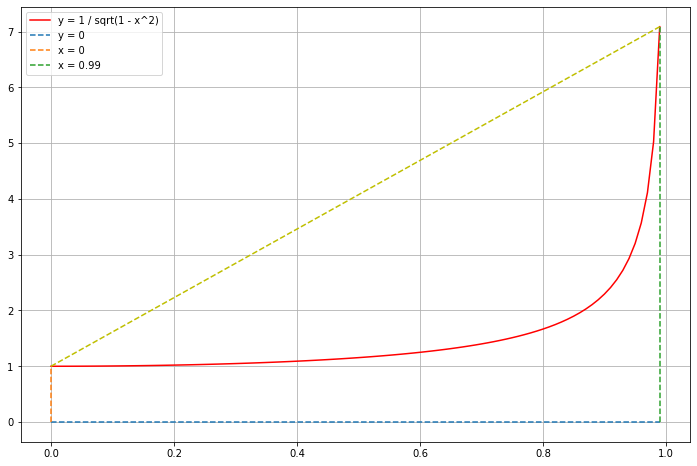


The area under the trapezoid ~ 4.003962

The area under the red curve ~ 1.432053


In [2]:
x0, xn, h = 0, 0.99, 0.01
n = int((xn - x0) / h)

X = np.linspace(x0, xn, num=n + 1)
Y = [eval_f(x) for x in X]

plt.figure(figsize=[12, 8])
plt.plot(X, Y, color='r', label='y = 1 / sqrt(1 - x^2)')
plt.plot([x0, xn], [0, 0], '--', label='y = 0')
plt.plot([x0, x0], [0, eval_f(x0)], '--', label='x = 0')
plt.plot([xn, xn], [0, eval_f(xn)], '--', label='x = 0.99')
plt.plot([x0, xn], [eval_f(x0), eval_f(xn)], '--', color='y')
plt.grid(which='both', axis='both')
plt.legend()
plt.show()

print('\nThe area under the trapezoid ~ {:.6f}'.format(trapezoidal_comp(x0, xn - x0)))

trapezoidal_sum = sum(trapezoidal_comp(x0, h) for x0 in X[:-1])    
print('\nThe area under the red curve ~ {:.6f}'.format(trapezoidal_sum))